In [1]:
#Importion all files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
from sklearn.cluster import KMeans
import zipfile

In [2]:
# ! kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python

In [3]:
try:
    with zipfile.ZipFile('customer-segmentation-tutorial-in-python.zip','r') as file:
        file.extractall()
        print('Executed')
except :
    print(FileNotFoundError)

Executed


In [4]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.min()

CustomerID                     1
Gender                    Female
Age                           18
Annual Income (k$)            15
Spending Score (1-100)         1
dtype: object

In [8]:
df.max()

CustomerID                 200
Gender                    Male
Age                         70
Annual Income (k$)         137
Spending Score (1-100)      99
dtype: object

In [9]:
df.groupby(df['Gender']).size()

Gender
Female    112
Male       88
dtype: int64

In [10]:
age_list=['18-25','26-35','36-45','46-55','55+']
def assign_agegroup(x):
    match x:
        case _ if x <= 25:
            return '18-25'
        case _ if x <= 35:
            return '26-35'
        case _ if x<=45:
            return '36-45'
        case _ if x<=55:
            return '46-55'
        case _:
            return '55+'

df['Age Group']=df['Age'].apply(assign_agegroup)


In [11]:
df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].groupby(df['Age Group']).describe()

Annual Income (k$)                        ... Spending Score (1-100)             
                       count       mean        std  ...                    50%    75%   max
Age Group                                           ...                                    
18-25                   38.0  45.684211  21.134198  ...                   55.0  75.75  94.0
26-35                   60.0  68.150000  30.747096  ...                   71.5  83.75  99.0
36-45                   36.0  72.055556  24.071257  ...                   39.5  75.00  95.0
46-55                   37.0  57.729730  21.693123  ...                   42.0  48.00  59.0
55+                     29.0  53.689655  18.384977  ...                   47.0  52.00  60.0

[5 rows x 16 columns]

In [12]:
df=df.rename(columns={'Spending Score (1-100)':'Spending_Score'})

In [13]:
df.loc[:,['Annual Income (k$)','Spending_Score']].groupby(df['Gender']).describe()

Annual Income (k$)                              ... Spending_Score                  
                    count       mean        std   min  ...            25%   50%   75%   max
Gender                                                 ...                                 
Female              112.0  59.250000  26.011952  16.0  ...           35.0  50.0  73.0  99.0
Male                 88.0  62.227273  26.638373  15.0  ...           24.5  50.0  70.0  97.0

[2 rows x 16 columns]

In [14]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending_Score,Age Group
0,1,Male,19,15,39,18-25
1,2,Male,21,15,81,18-25
2,3,Female,20,16,6,18-25
3,4,Female,23,16,77,18-25
4,5,Female,31,17,40,26-35
5,6,Female,22,17,76,18-25
6,7,Female,35,18,6,26-35
7,8,Female,23,18,94,18-25
8,9,Male,64,19,3,55+
9,10,Female,30,19,72,26-35


In [15]:
order = ['18-25', '26-35', '36-45', '46-55', '55+']

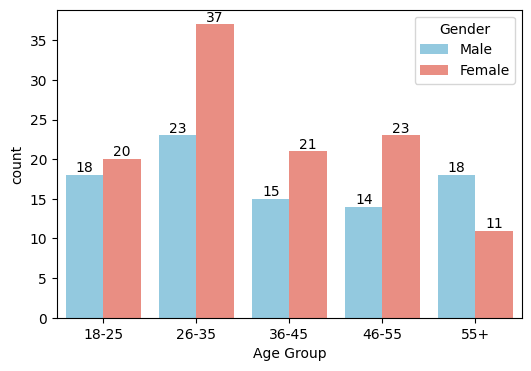

In [16]:
plt.figure(figsize=(6,4))
cp=sns.color_palette()
cnt_ax=sns.countplot(df,x='Age Group',hue='Gender',order=order,palette=["skyblue", "salmon"])
for container in cnt_ax.containers:#type: ignore
    cnt_ax.bar_label(container)

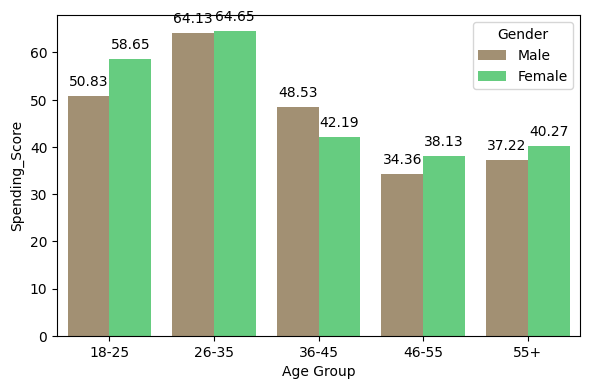

In [17]:
plt.figure(figsize=(6,4))
bar_ax=sns.barplot(df, x='Age Group', y='Spending_Score',hue='Gender', errorbar=None, order=order,palette='terrain_r')
for container in bar_ax.containers:
    for bar in container:
        height = bar.get_height()
        bar_ax.annotate(
            f'{height:.2f}', 
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5),
            textcoords="offset points",
            ha='center',
            va='bottom'
        )
# palette=terrain_r,deep,bright,dark,muted,BuGn_r
plt.tight_layout()
plt.show()

<Axes: xlabel='Age Group', ylabel='Spending_Score'>

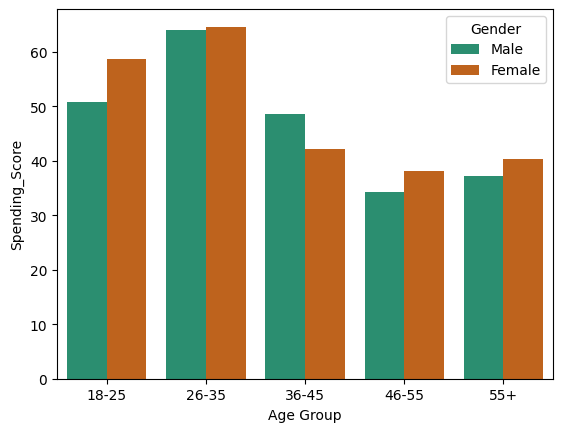

In [18]:
sns.barplot(df,x='Age Group',y='Spending_Score',hue='Gender',errorbar=None,palette='Dark2',order=order)


In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending_Score,Age Group
0,1,Male,19,15,39,18-25
1,2,Male,21,15,81,18-25
2,3,Female,20,16,6,18-25
3,4,Female,23,16,77,18-25
4,5,Female,31,17,40,26-35


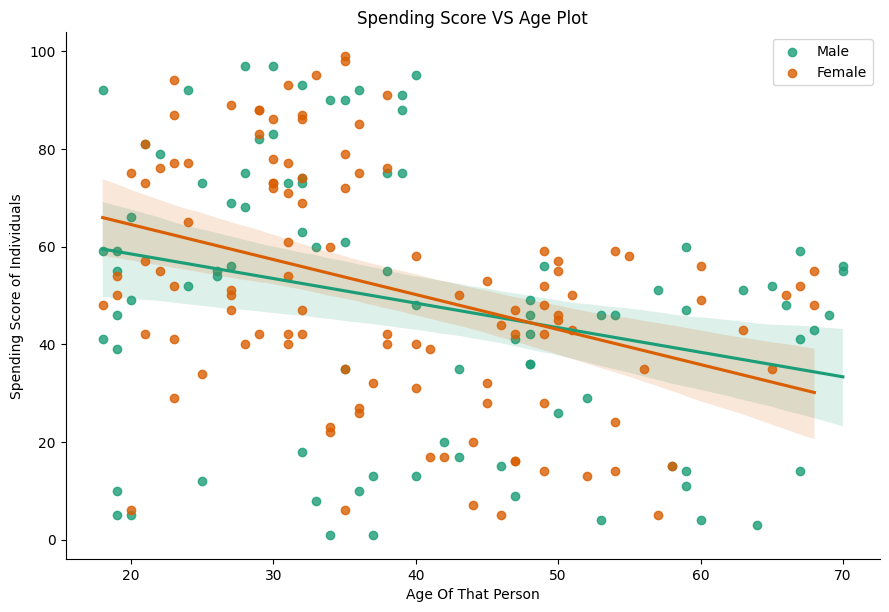

In [20]:
sns.lmplot(df,x='Age',y='Spending_Score',hue='Gender',palette='Dark2',legend=False,height=6,aspect=1.5)
plt.title('Spending Score VS Age Plot')
plt.ylabel('Spending Score of Individuals')
plt.xlabel('Age Of That Person')
plt.legend()
plt.show()

We can clearly see a trend in this scatter plot -
- customers in the age between 18-35 have a higher spending score compared to other age groups. Then the spending score decreases as the age increases.
- Women have a higher spending score than men in below 50 age group, but in the above 50 age men spending score is higher

Buisness Implications:
- Target the age group of 18-35 for marketing campaigns as they have a higher spending score.
- Since women have a higher spending , So, mall can store more products that can attract them more.
- To attract the older age group, mall can introduce products that are more appealing to them.

In [21]:
avg_income=df['Annual Income (k$)'].mean()
avg_income_gender=df['Annual Income (k$)'].groupby(df['Gender']).mean()
print(avg_income)
print(avg_income_gender)

60.56
Gender
Female    59.250000
Male      62.227273
Name: Annual Income (k$), dtype: float64


In [22]:
avg_spending_score=df['Spending_Score'].mean()
avg_spending_score_gender=df['Spending_Score'].groupby(df['Gender']).mean()
print(avg_spending_score)
print(avg_spending_score_gender)

50.2
Gender
Female    51.526786
Male      48.511364
Name: Spending_Score, dtype: float64


<Axes: xlabel='Spending_Score', ylabel='Annual Income (k$)'>

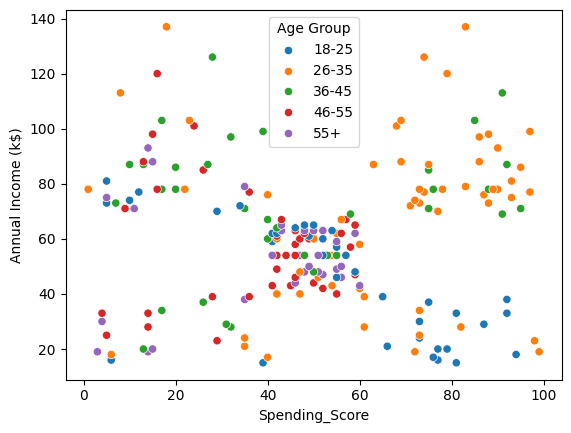

In [23]:
sns.scatterplot(df,x='Spending_Score',y='Annual Income (k$)',hue='Age Group',hue_order=order)

So, form this scatter plot We can clearl see that 

In [24]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending_Score,Age Group
0,1,Male,19,15,39,18-25
1,2,Male,21,15,81,18-25
2,3,Female,20,16,6,18-25
3,4,Female,23,16,77,18-25
4,5,Female,31,17,40,26-35


In [27]:
data_set=df.loc[:,['Annual Income (k$)','Spending_Score']]
data_set

,Annual Income (k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


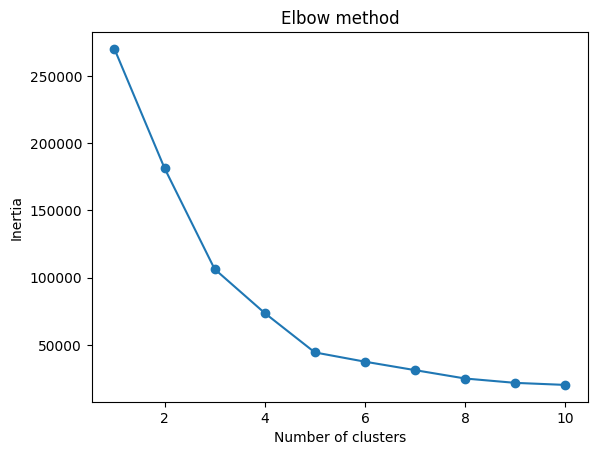

In [32]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='random',random_state=42)
    kmeans.fit(data_set)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()    

Number of clusters is 5

In [37]:
kmean=KMeans(n_clusters=5,init='k-means++')
Y=kmean.fit_predict(data_set)
Y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

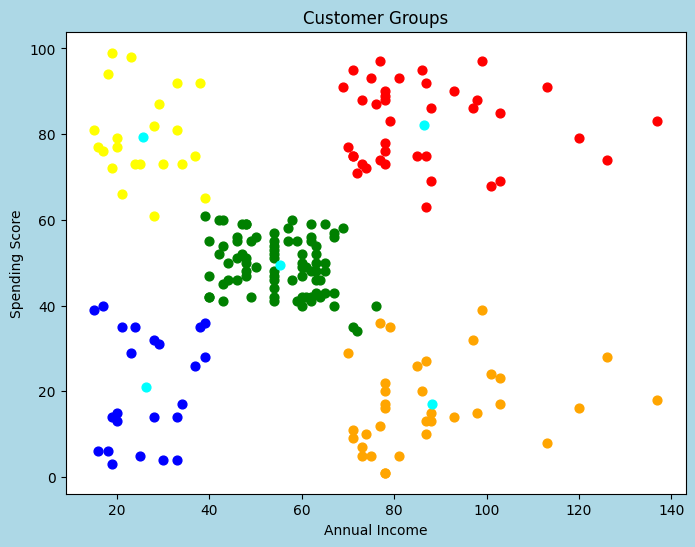

In [57]:
plt.figure(figsize=(8,6),facecolor='lightblue')
plt.scatter(data_set.values[Y==0, 0], data_set.values[Y==0, 1], s=40, c='green',label='verage Income and Average Spending Score')
plt.scatter(data_set.values[Y==1, 0], data_set.values[Y==1, 1], s=40, c='red',label='High Income and High Spending Score')
plt.scatter(data_set.values[Y==2, 0], data_set.values[Y==2, 1], s=40, c='yellow',label='High Income and Low Spending Score')
plt.scatter(data_set.values[Y==3, 0], data_set.values[Y==3, 1], s=40, c='orange',label='Low Income and High Spending Score')
plt.scatter(data_set.values[Y==4, 0], data_set.values[Y==4, 1], s=40, c='blue',label='Low Income and Low Spending Score')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=40,c='cyan',label='Centroid')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
